In [1068]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [1069]:
#read the dataset and check the first five rows
lendingClubData = pd.read_csv("loan.csv")
lendingClubData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1070]:
#Check the shape of the dataframe
lendingClubData.shape

(39717, 111)

In [1071]:
#Check the datatypes of all the columns of the dataframe
lendingClubData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1072]:
#Check the number of null values in the columns
lendingClubData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [1073]:
#There are multiple columns where all values as Nan. Hence dropping them.
lendingClubData.dropna(how='all', axis=1, inplace=True)
lendingClubData.shape

(39717, 57)

In [1074]:
#Check remaining columns for null values
lendingClubData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [1075]:
# Few columns contains more than 50% null values. Check columns with more than 50% null values
check = lendingClubData.isnull().sum() / len(lendingClubData) 
cols = check[check > 0.5].index
lendingClubData[cols]

,mths_since_last_delinq,mths_since_last_record,next_pymnt_d
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,35.0,NaN,NaN
4,38.0,NaN,Jun-16
...,...,...,...
39712,0.0,0.0,NaN
39713,5.0,0.0,NaN
39714,0.0,0.0,NaN
39715,0.0,0.0,NaN


In [1076]:
#Droping columns with more than 50% null values
lendingClubData.drop(cols, axis=1, inplace=True)
lendingClubData.shape

(39717, 54)

In [1077]:
#Check further columns for null values
lendingClubData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [1078]:
#There are more null values in desc column. Hence inspect the values in the desc column
lendingClubData['desc'].value_counts()

desc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           210
Debt Consolidation                                                                                                                                                                  

In [1079]:
#It looks like desc column gives some description which is not useful for our analysis. Hence we can drop it.
lendingClubData.drop(["desc"], axis=1, inplace=True)

In [1080]:
#Check values in emp_title ,emp_length, pub_rec_bankruptcies
lendingClubData['emp_title'].value_counts()
lendingClubData['emp_length'].value_counts()
lendingClubData['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [1081]:
#emp_title shows job title of borrower shows borrower's work experience. Hence these columns can be dropped
lendingClubData.drop(["emp_title"], axis=1, inplace=True)
lendingClubData.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

In [1082]:
# Replace NA values in pub_rec_bankruptcies with zero
lendingClubData['pub_rec_bankruptcies'] = lendingClubData['pub_rec_bankruptcies'].fillna(0)
lendingClubData.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

In [1083]:
# Check Nan values in title, revol_util, last_pymnt_d, collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens, last_credit_pull_d
lendingClubData['title'].value_counts()
lendingClubData['last_pymnt_d'].value_counts()
lendingClubData['collections_12_mths_ex_med'].value_counts()
lendingClubData['chargeoff_within_12_mths'].value_counts()
lendingClubData['tax_liens'].value_counts()
lendingClubData['last_credit_pull_d'].value_counts()
lendingClubData['revol_util'].value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [1084]:
# title column has random values, collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens all values as zero. Hence dropping title, collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens column
lendingClubData.drop(["title", "collections_12_mths_ex_med", "chargeoff_within_12_mths", "tax_liens"], axis=1, inplace=True)

In [1085]:
#Replacing Nan values in column revol_util with zero
lendingClubData["revol_util"] = lendingClubData["revol_util"].fillna(0)
lendingClubData.shape

(39717, 48)

In [1086]:
#There are some columns such as "id", "member_id", "url", "zip_code", "last_credit_pull_d", "addr_state". These columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
#"out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.
#"funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.
#There are several columns which are single value. So removing them
lendingClubData.drop(['pymnt_plan', "initial_list_status",'policy_code','acc_now_delinq', 'application_type', 'delinq_amnt', "id", "member_id", "url", "zip_code", "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt"], axis = 1, inplace = True)
lendingClubData.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,27.65,Jan-85,1,3,0,83.70%,9,Jan-15,May-16,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,1.00,Apr-99,5,3,0,9.40%,4,Apr-13,Sep-13,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,8.72,Nov-01,2,2,0,98.50%,10,Jun-14,May-16,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,20.00,Feb-96,1,10,0,21%,37,Jan-15,Apr-16,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,17.94,Jan-96,0,15,0,53.90%,38,May-16,May-16,0.0


In [1087]:
lendingClubData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  earliest_cr_line   

In [1088]:
#Handling missing values for emp_length, last_pymnt_d & last_credit_pull_d
lendingClubData.emp_length.fillna(0, inplace = True)
lendingClubData=lendingClubData[~lendingClubData.last_pymnt_d.isnull()]
lendingClubData=lendingClubData[~lendingClubData.last_credit_pull_d.isnull()]
lendingClubData.info()
#Handled all missing values

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39644 non-null  int64  
 1   funded_amnt_inv       39644 non-null  float64
 2   term                  39644 non-null  object 
 3   int_rate              39644 non-null  object 
 4   installment           39644 non-null  float64
 5   grade                 39644 non-null  object 
 6   sub_grade             39644 non-null  object 
 7   emp_length            39644 non-null  object 
 8   home_ownership        39644 non-null  object 
 9   annual_inc            39644 non-null  float64
 10  verification_status   39644 non-null  object 
 11  issue_d               39644 non-null  object 
 12  loan_status           39644 non-null  object 
 13  purpose               39644 non-null  object 
 14  dti                   39644 non-null  float64
 15  earliest_cr_line      39

In [1089]:
#Changing datatype of "issue_d", "earliest_cr_line, "last_credit_pull_d", "last_pymnt_d" columns" from object to specific type
lendingClubData.issue_d = pd.to_datetime(lendingClubData.issue_d, format='%b-%y')
lendingClubData.earliest_cr_line = pd.to_datetime(lendingClubData.earliest_cr_line, format='%b-%y')
lendingClubData.last_pymnt_d = pd.to_datetime(lendingClubData.last_pymnt_d, format='%b-%y')
lendingClubData.last_credit_pull_d = pd.to_datetime(lendingClubData.last_credit_pull_d, format='%b-%y')
lendingClubData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39644 non-null  int64         
 1   funded_amnt_inv       39644 non-null  float64       
 2   term                  39644 non-null  object        
 3   int_rate              39644 non-null  object        
 4   installment           39644 non-null  float64       
 5   grade                 39644 non-null  object        
 6   sub_grade             39644 non-null  object        
 7   emp_length            39644 non-null  object        
 8   home_ownership        39644 non-null  object        
 9   annual_inc            39644 non-null  float64       
 10  verification_status   39644 non-null  object        
 11  issue_d               39644 non-null  datetime64[ns]
 12  loan_status           39644 non-null  object        
 13  purpose              

In [1090]:
#Dropping duplicate rows
lendingClubData=lendingClubData.drop_duplicates()
lendingClubData.shape
# No duplicate rows present

(39644, 24)

In [1091]:
# columns such as int_rate & revol_util has % symbol. Removing % symbol to convert it to float
lendingClubData['int_rate'] = lendingClubData['int_rate'].str.strip('%').astype('float')
lendingClubData['revol_util'] = lendingClubData['revol_util'].str.strip('%').astype('float')

In [1092]:
# Converting emp_lenght column to int by removing year & term column to int by removing month
lendingClubData['emp_length']=lendingClubData['emp_length'].str.extract('(\d+)').astype('float')
lendingClubData['emp_length'].value_counts()

emp_length
10.0    8870
1.0     7803
2.0     4382
3.0     4088
4.0     3428
5.0     3272
6.0     2228
7.0     1772
8.0     1476
9.0     1255
Name: count, dtype: int64

In [1093]:
lendingClubData['term']=lendingClubData['term'].str.extract('(\d+)').astype('int')
lendingClubData['term'].value_counts()

term
36    29041
60    10603
Name: count, dtype: int64

In [1094]:
lendingClubData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39644 non-null  int64         
 1   funded_amnt_inv       39644 non-null  float64       
 2   term                  39644 non-null  int32         
 3   int_rate              39644 non-null  float64       
 4   installment           39644 non-null  float64       
 5   grade                 39644 non-null  object        
 6   sub_grade             39644 non-null  object        
 7   emp_length            38574 non-null  float64       
 8   home_ownership        39644 non-null  object        
 9   annual_inc            39644 non-null  float64       
 10  verification_status   39644 non-null  object        
 11  issue_d               39644 non-null  datetime64[ns]
 12  loan_status           39644 non-null  object        
 13  purpose              

<Axes: ylabel='loan_amnt'>

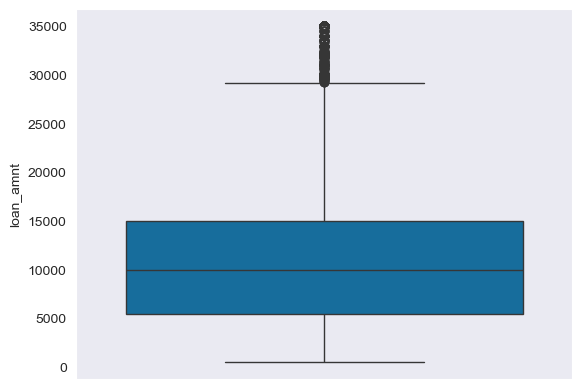

In [1095]:
#Checking loan amount for outliers
sns.boxplot(lendingClubData.loan_amnt)
## There few outliers but distribution is visible. Hence no need to remove outliers

<Axes: ylabel='funded_amnt_inv'>

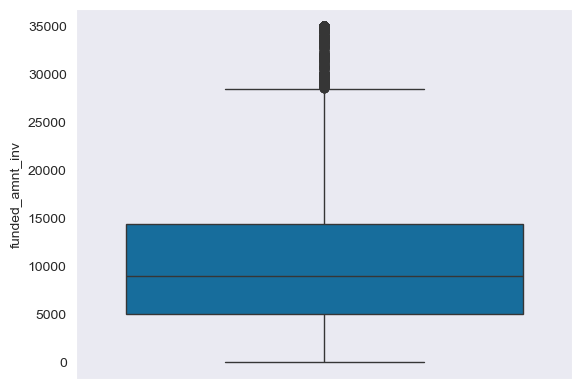

In [1096]:
# Check funded_amnt_inv for extreme values
sns.boxplot(lendingClubData["funded_amnt_inv"])
## There few outliers but distribution is visible. Hence no need to remove outliers

<Axes: ylabel='int_rate'>

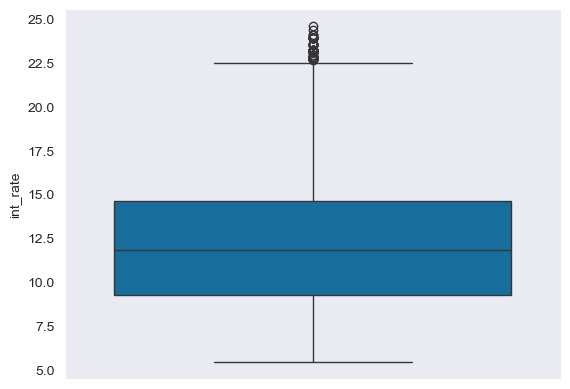

In [1097]:
# Check int_rate for extreme values
sns.boxplot(lendingClubData["int_rate"])
## There few outliers but distribution is visible. Hence no need to remove outliers

<Axes: ylabel='annual_inc'>

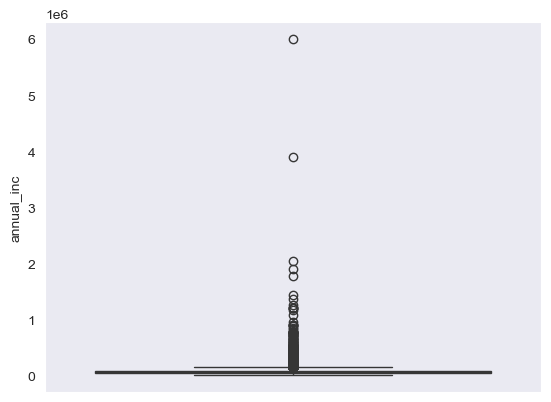

In [1098]:
# Check annual_inc for extreme values
sns.boxplot(lendingClubData['annual_inc'])
#Annual income has extreme outliers. Hence removing outliers

In [1099]:
#Let's see the quantile info and take an appropriate action.
#The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
#So, considering threshold for removing outliers as 0.95
lendingClubData.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
lendingClubData = lendingClubData[lendingClubData.annual_inc <= lendingClubData['annual_inc'].quantile(0.95)]

<Axes: ylabel='annual_inc'>

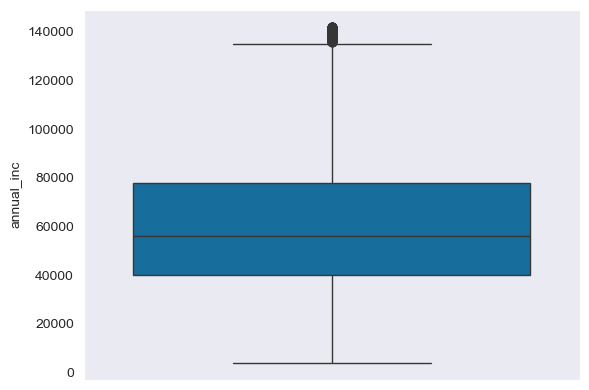

In [1100]:
sns.boxplot(lendingClubData.annual_inc)

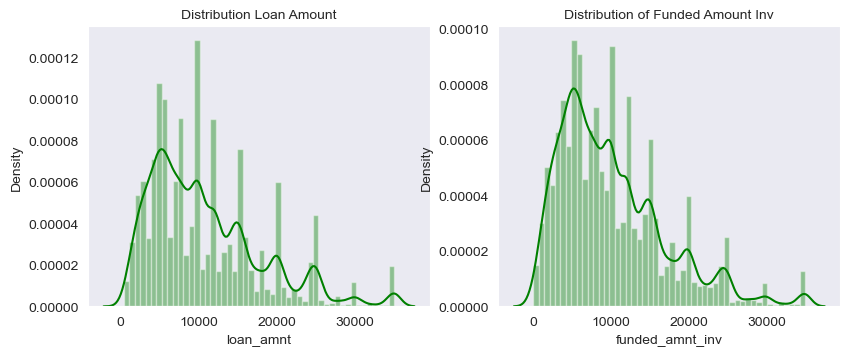

In [1101]:
#PLotting distplot from int_rate
plt.figure(figsize=(15,8))

# subplot 1
plt.subplot(2, 3, 1)
sns.set_style("dark")
ax = sns.distplot(lendingClubData['loan_amnt'], color='g')
ax.set_title('Distribution Loan Amount',fontsize=10)

# subplot 2
plt.subplot(2, 3, 2)
ax= sns.distplot(lendingClubData['funded_amnt_inv'], color='g')
ax.set_title("Distribution of Funded Amount Inv", fontsize=10)
plt.show()

# Observation: 
# Distribution of amounts for both looks very much similar.
# We will work with only loan amount column for rest of our analysis.

<Axes: xlabel='loan_status'>

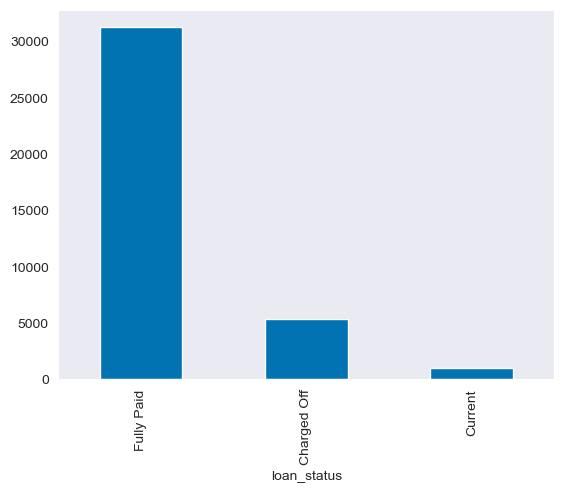

In [1102]:
##Visualising Categorical Data
# Visualizing loan_status data
lendingClubData['loan_status'].value_counts().plot.bar()
           
# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

<Axes: xlabel='home_ownership'>

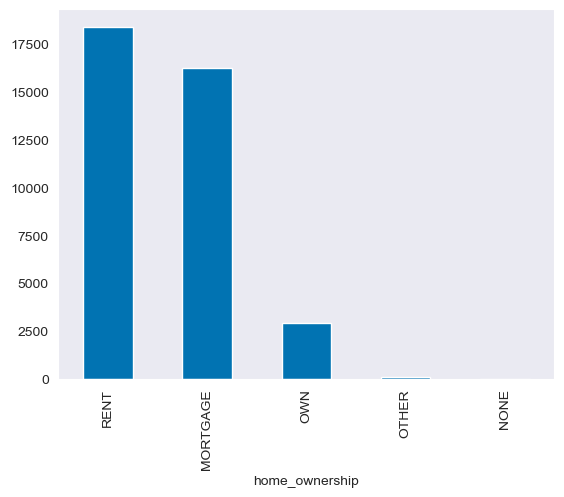

In [1103]:
# Visualizing home ownership data
lendingClubData.home_ownership.value_counts().plot.bar()

# More members are living in rented house followed by mortgage

<Axes: xlabel='grade'>

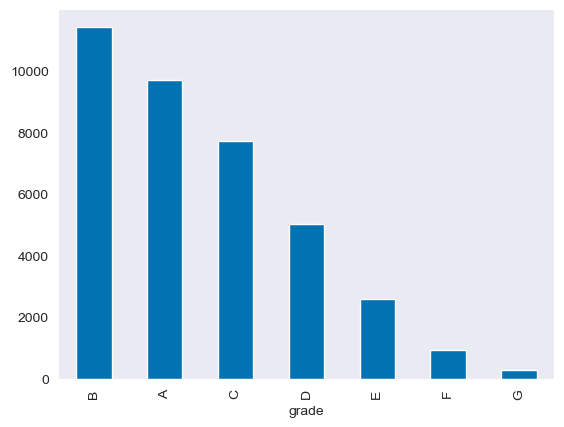

In [1104]:
# Visualizing grade data
lendingClubData.grade.value_counts().plot.bar()

# More members with Grade B followed by A & then C

<Axes: xlabel='purpose'>

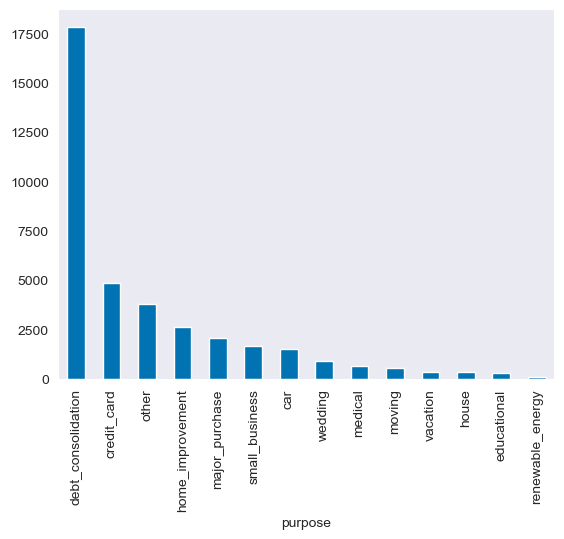

In [1105]:
# Visualizing purpose data
lendingClubData.purpose.value_counts().plot.bar()

# More members has taken loan for debt consolidation  followed by credit card

<Axes: xlabel='emp_length'>

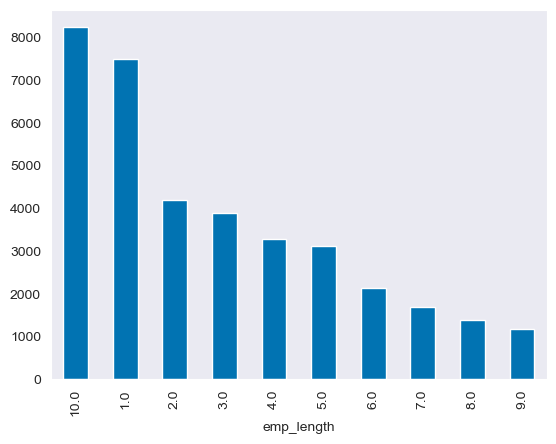

In [1106]:
# Visualizing emp_length data
lendingClubData.emp_length.value_counts().plot.bar()

# More members has employment length 10 years followed by 1 year

In [1107]:
## Bivariate Analysis

#Removing Alphabets from subgrades
lendingClubData.sub_grade = pd.to_numeric(lendingClubData.sub_grade.apply(lambda x : x[-1]))

Text(0.5, 1.0, 'Grade Vs Charged Off')

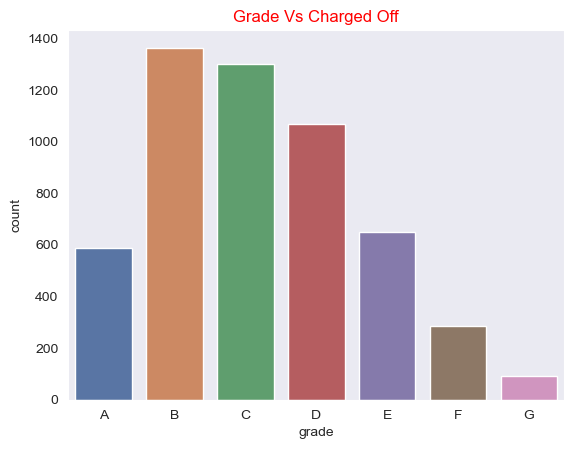

In [1108]:
plot =sns.countplot(x = 'grade', data = lendingClubData[lendingClubData.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette="deep")
plot.set_title("Grade Vs Charged Off", color="r")
#Most of the charged off applicants are having B5 grade

<Axes: title={'center': 'Sub Grades Vs Charged Off'}, xlabel='grade', ylabel='count'>

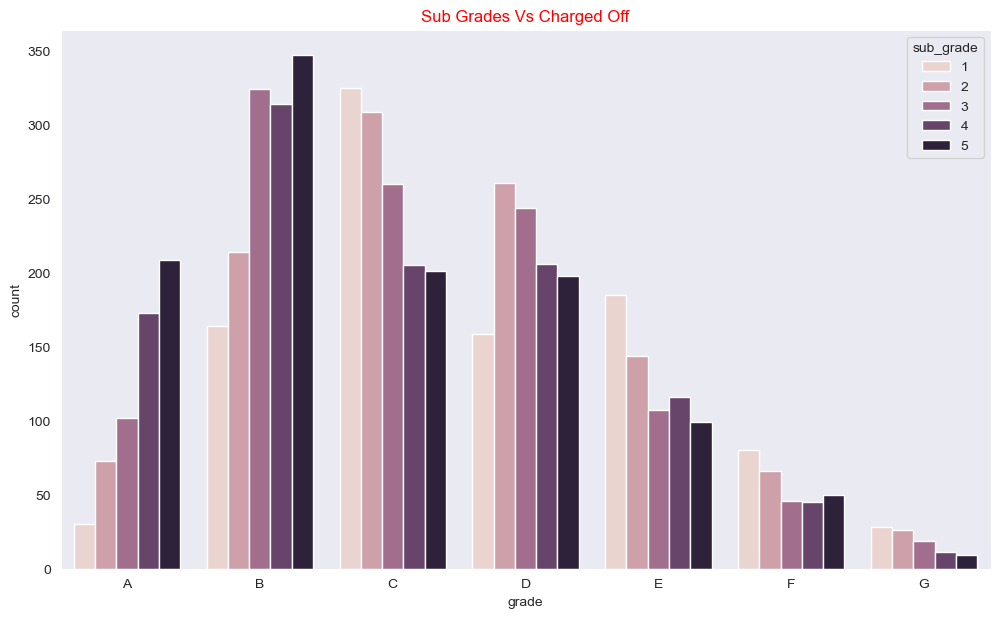

In [1109]:
#Further Grade analysis using sub grades vs charged off
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title("Sub Grades Vs Charged Off", color="r")
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = lendingClubData[lendingClubData.loan_status == 'Charged Off'])

##  Most of the charged off applicants are having B5 sub grade

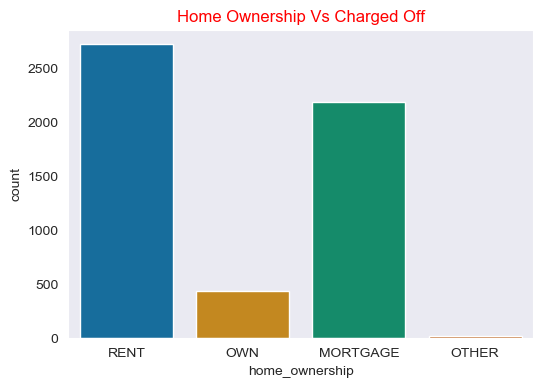

In [1110]:
#Analysing Home wonership Vs Charged Off
fig, ax = plt.subplots(figsize = (6,4))
ax.set_title("Home Ownership Vs Charged Off", color="r")
sns.countplot(x='home_ownership', data=lendingClubData[lendingClubData['loan_status']=='Charged Off'], palette='colorblind')
plt.show()
## Most of the charged off applicants are living in rented house

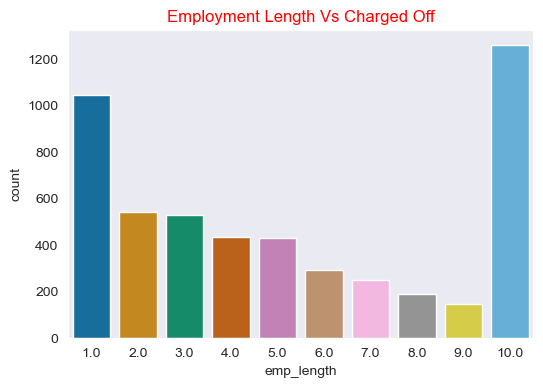

In [1111]:
#Analysing Employment Length Vs Charged off
fig, ax = plt.subplots(figsize = (6,4))
ax.set_title("Employment Length Vs Charged Off", color="r")
sns.countplot(x='emp_length', data=lendingClubData[lendingClubData['loan_status']=='Charged Off'], palette='colorblind')
plt.show()

#Most of the charged off applicants have 10 years of employment length 

In [1112]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
lendingClubData['loan_amnt_category'] = pd.cut(lendingClubData['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
lendingClubData['annual_inc_category'] = pd.cut(lendingClubData['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
lendingClubData['int_rate_category'] = pd.cut(lendingClubData['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
lendingClubData['dti_category'] = pd.cut(lendingClubData['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [1113]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_rangeVsLoan = lendingClubData.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_rangeVsLoan['Total'] = inc_rangeVsLoan['Charged Off'] + inc_rangeVsLoan['Current'] + inc_rangeVsLoan['Fully Paid'] 
inc_rangeVsLoan['Chargedoff_Proportion'] = inc_rangeVsLoan['Charged Off'] / inc_rangeVsLoan['Total']
inc_rangeVsLoan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status,annual_inc_category,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,223,9,943,1175,0.189787
1,20000-40000,1496,170,7004,8670,0.172549
2,40000-60000,1711,345,9534,11590,0.147627
3,60000-80000,1009,240,6597,7846,0.128601
4,80000 +,910,290,7189,8389,0.108475


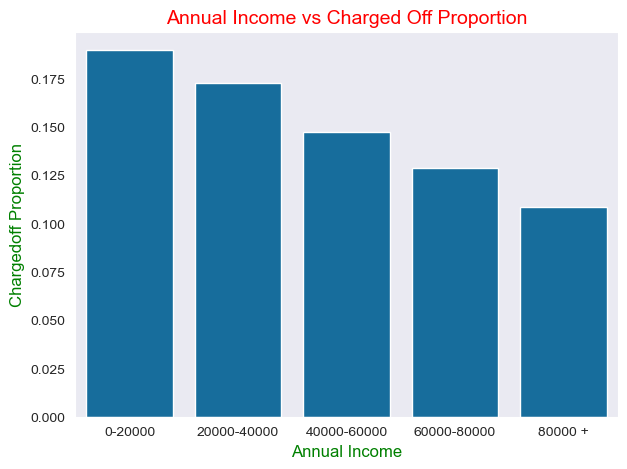

In [1114]:
#Trying to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.set_title('Annual Income vs Charged Off Proportion',fontsize=14,color = 'r')
ax1=sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data=inc_rangeVsLoan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'g')
ax1.set_xlabel('Annual Income',fontsize=12,color='g')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [1115]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interestVsLoan = lendingClubData.groupby(['int_rate_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interestVsLoan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] /(interestVsLoan['Charged Off'] + interestVsLoan['Current'] + interest_vs_loan['Fully Paid'])
interestVsLoan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Interest rates are starting from minimin 5 %.
# interest rate more than 16% has good chances of charged off as compared to other category interest rates.
# Charged off proportion is increasing with higher interest rates.

loan_status,int_rate_category,Charged Off,Current,Fully Paid,Chargedoff_Proportion
3,16 +,1177,331,3132,0.253664
2,12.5-16,1919,311,8987,0.171080
1,10-13,1182,255,7720,0.129082
0,0-10,805,75,11021,0.067641


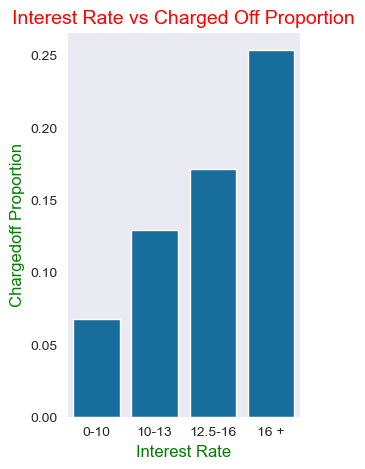

In [1116]:
# Analysing bar plots on data calculated above interest to understand the data better.

fig, ax1 = plt.subplots(figsize=(3, 5))
ax1.set_title('Interest Rate vs Charged Off Proportion',fontsize=14,color='r')
ax1=sns.barplot(x='int_rate_category', y='Chargedoff_Proportion', data=interestVsLoan)
ax1.set_xlabel('Interest Rate',fontsize=12,color='g')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'g')
plt.show()

In [1117]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verify_vs_loan = lendingClubData.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index() 
verify_vs_loan['Chargedoff_Proportion'] = verify_vs_loan['Charged Off'] / (verify_vs_loan['Charged Off'] + verify_vs_loan['Current'] + verify_vs_loan['Fully Paid'])
verify_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status,verification_status,Charged Off,Current,Fully Paid,Chargedoff_Proportion
2,Verified,1931,547,9289,0.164103
1,Source Verified,1359,282,7789,0.144115
0,Not Verified,2059,225,14189,0.124992


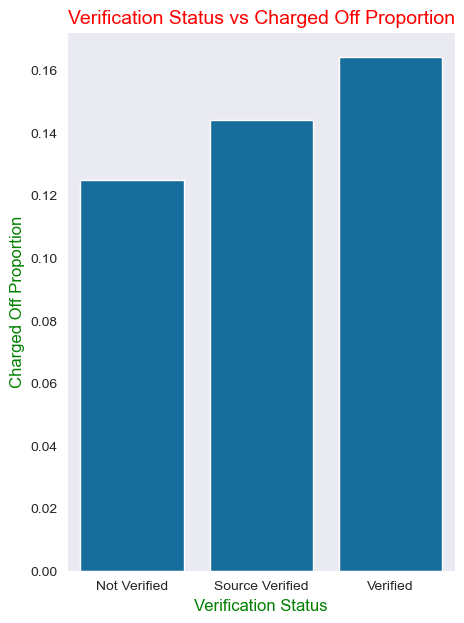

In [1118]:
# Visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(5, 7))
ax1.set_title('Verification Status vs Charged Off Proportion',fontsize=14,color='r')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verify_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=12,color='g')
ax1.set_ylabel('Charged Off Proportion',fontsize=12,color = 'g')
plt.show()

<Axes: xlabel='issue_year', ylabel='count'>

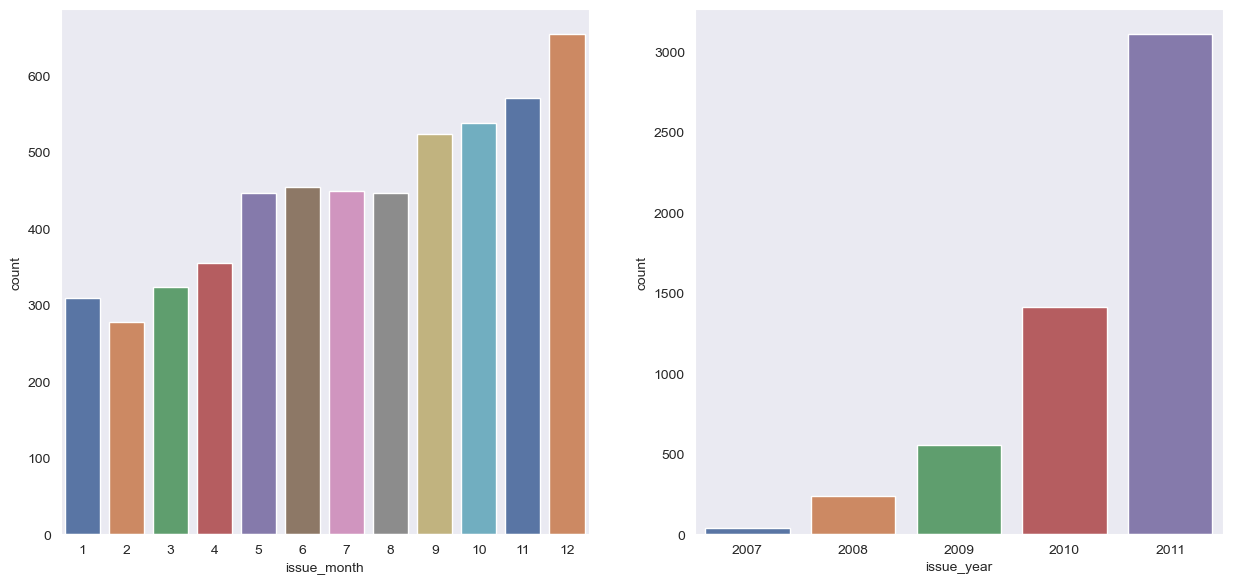

In [1119]:
## Extracting month and year. ANalyse month & year data Vs Charged off data
     
lendingClubData['issue_year']=(lendingClubData['issue_d']).dt.year
lendingClubData['issue_month']=lendingClubData['issue_d'].dt.month

plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=lendingClubData[lendingClubData['loan_status']=='Charged Off'],palette="deep")
plt.subplot(222)
sns.countplot(x='issue_year', data=lendingClubData[lendingClubData['loan_status']=='Charged Off'],palette="deep")

#Maximum number of charged off occured when the loan was issued in Dec. Loan issued in the year 2011 were also as compared to other years

In [1120]:
lendingClubData['installment_groups'] = pd.cut(lendingClubData['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
lendingClubData['funded_amnt_inv_group'] = pd.cut(lendingClubData['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
lendingClubData['loan_amnt_groups'] = pd.cut(lendingClubData['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lendingClubData['dti_groups'] = pd.cut(lendingClubData['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

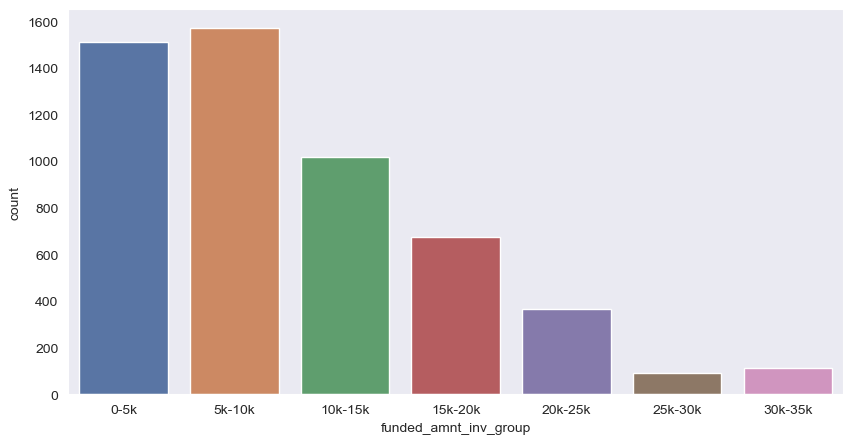

In [1121]:
fig,ax = plt.subplots(figsize = (10,5))
sns.countplot(x='funded_amnt_inv_group', data=lendingClubData[lendingClubData['loan_status']=='Charged Off'],palette="deep")

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

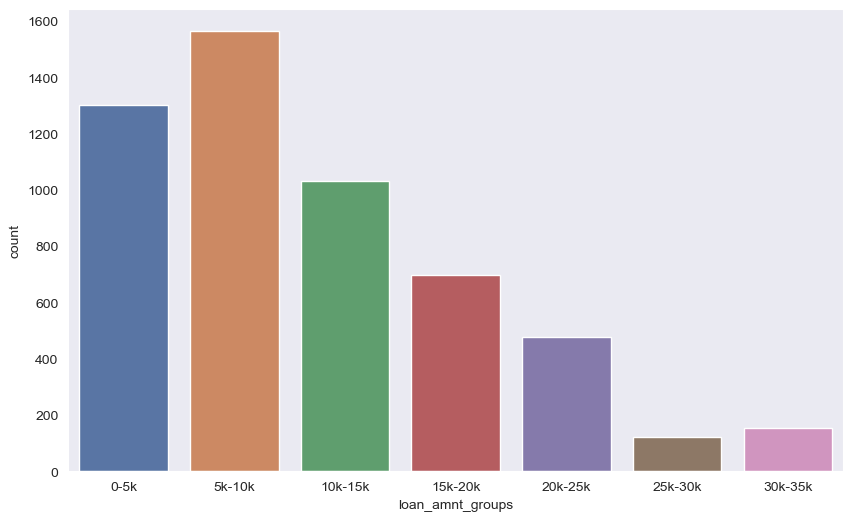

In [1122]:
fig,ax = plt.subplots(figsize = (10,6))
sns.countplot(x='loan_amnt_groups', data=lendingClubData[lendingClubData['loan_status']=='Charged Off'],palette="deep")

<Axes: xlabel='dti_groups', ylabel='count'>

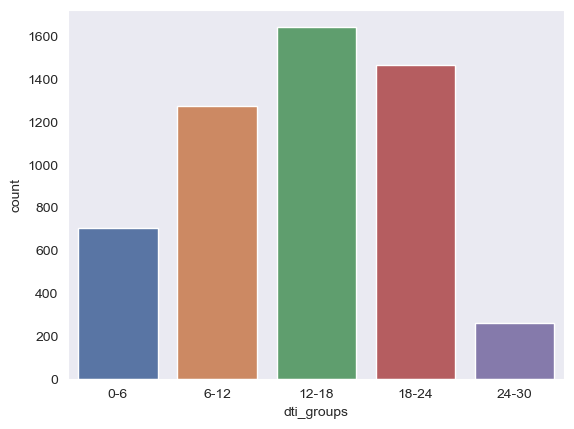

In [1123]:
sns.countplot(x='dti_groups', data=lendingClubData[lendingClubData['loan_status']=='Charged Off'],palette="deep")

<Axes: xlabel='installment_groups', ylabel='count'>

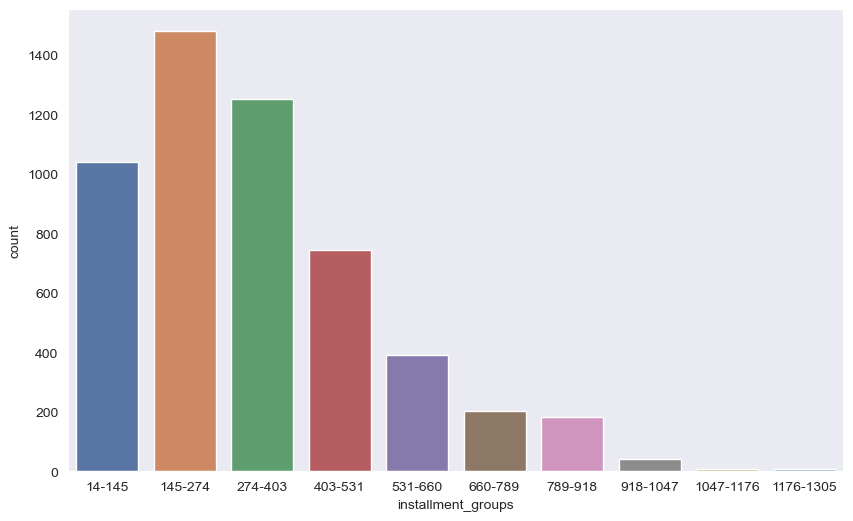

In [1124]:
fig,ax = plt.subplots(figsize = (10,6))
sns.countplot(x='installment_groups', data=lendingClubData[lendingClubData['loan_status']=='Charged Off'],palette="deep")

In [1125]:
#The analysis with respect to the charged off loans for each variable is as below. There is a more probability of defaulting when :
#Applicants who receive interest at the rate of 13-17%
#Applicants who have an income of range 31201 - 58402
#When funded amount by investor is between 5000-10000
#Loan amount is between 5429 - 10357
#Dti is between 12-18
#When monthly installments are between 145-274

In [1126]:
#Correlation Matrix

numeric_columns = ['loan_amnt','funded_amnt_inv','revol_util','emp_length','open_acc','int_rate','installment','annual_inc','dti','pub_rec',]
correlation_matrix = lendingClubData[numeric_columns].corr()

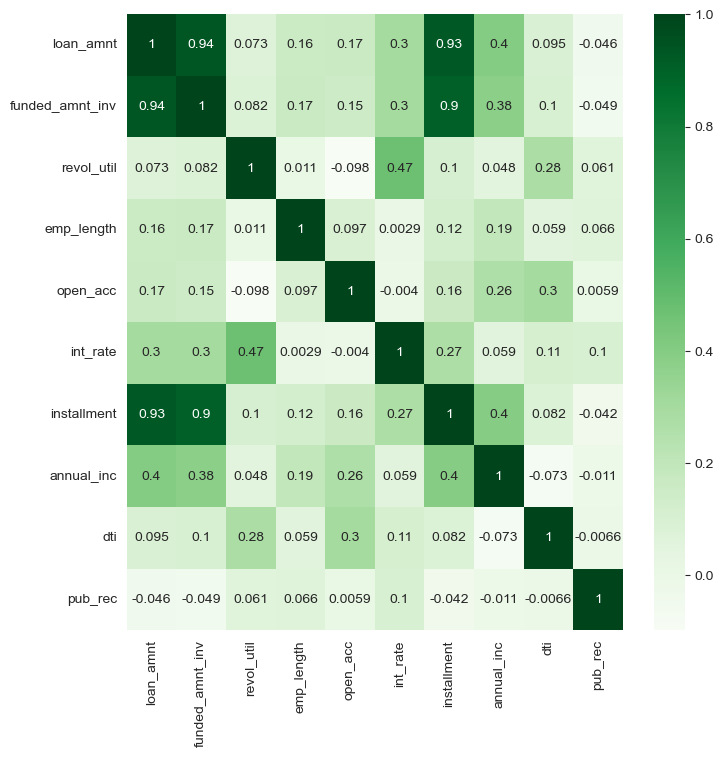

In [1127]:
ax = plt.subplots(figsize= (8,8))

sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           cmap= 'Greens', annot = True)
plt.xticks(rotation=90)
plt.show()